In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
cdf = pd.read_csv('../data/clean_TellCo_data.csv')
cdf.isnull().sum().sum()

0

Identifying Top 10 handsets used by customers

In [39]:
#frequency of unique values in a column
handset_frequency = cdf['Handset Type'].value_counts()
handset_frequency[0:10]


Huawei B528S-23A                19790
Apple iPhone 6S (A1688)          9452
Apple iPhone 6 (A1586)           9062
undefined                        9018
Apple iPhone 7 (A1778)           6361
Apple iPhone Se (A1723)          5210
Apple iPhone 8 (A1905)           5027
Apple iPhone Xr (A2105)          4585
Samsung Galaxy S8 (Sm-G950F)     4540
Apple iPhone X (A1901)           3825
Name: Handset Type, dtype: int64

<AxesSubplot:>

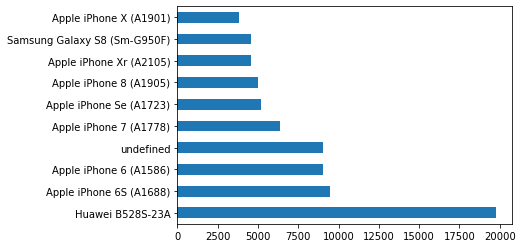

In [40]:
cdf['Handset Type'].value_counts()[:10].plot(kind='barh')

Identifying top 3 Handset manufactures


In [5]:
# top 3 handset manufacturers
top_3_handset_manufacturers = cdf['Handset Manufacturer'].value_counts()[:3]
top_3_handset_manufacturers


Apple      59826
Samsung    40980
Huawei     34527
Name: Handset Manufacturer, dtype: int64

Identifying top 5 Handsets type per 3 handset manufacturers

In [6]:
#top 5 handset in Apple manufacturer
handset_manufacturer_group = cdf.groupby(['Handset Manufacturer'])
handset_manufacturer_group.get_group('Apple')['Handset Type'].value_counts()[:5]


Apple iPhone 6S (A1688)    9452
Apple iPhone 6 (A1586)     9062
Apple iPhone 7 (A1778)     6361
Apple iPhone Se (A1723)    5210
Apple iPhone 8 (A1905)     5027
Name: Handset Type, dtype: int64

In [7]:
#top 5 handset Type in Samsung
handset_manufacturer_group = cdf.groupby(['Handset Manufacturer'])
handset_manufacturer_group.get_group('Samsung')['Handset Type'].value_counts()[:5]

Samsung Galaxy S8 (Sm-G950F)    4540
Samsung Galaxy A5 Sm-A520F      3736
Samsung Galaxy J5 (Sm-J530)     3704
Samsung Galaxy J3 (Sm-J330)     3494
Samsung Galaxy S7 (Sm-G930X)    3212
Name: Handset Type, dtype: int64

In [8]:
#top 5 HAndset type in  Huawei manufacturer
handset_manufacturer_group = cdf.groupby('Handset Manufacturer')
handset_manufacturer_group.get_group('Huawei')['Handset Type'].value_counts()[:5]


Huawei B528S-23A                  19790
Huawei E5180                       2085
Huawei P20 Lite Huawei Nova 3E     2030
Huawei P20                         1482
Huawei Y6 2018                     1002
Name: Handset Type, dtype: int64

Interpretation and recommendation for marketing teams
Based on the analysis above we can see that the top manufacturers are Apple, Samsung, and Huawei. Therefore, I like to recommend the marketing team focus more of the advertising to these three manufacturer.

Transforming Data
Scaling and Normalization 

In [9]:
from sklearn.preprocessing import  MinMaxScaler
minmax_scaler = MinMaxScaler()
# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)


,0
1479,18.416657
45,3.685581
157,23.636115
427,79.363953
195,89.640514


In [13]:

original_data[0].min(), original_data[0].max()

(0.0745186875049152, 1676.725891251768)

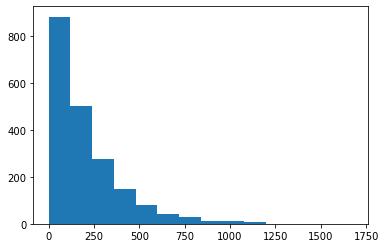

In [16]:
from matplotlib import pyplot as plt
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

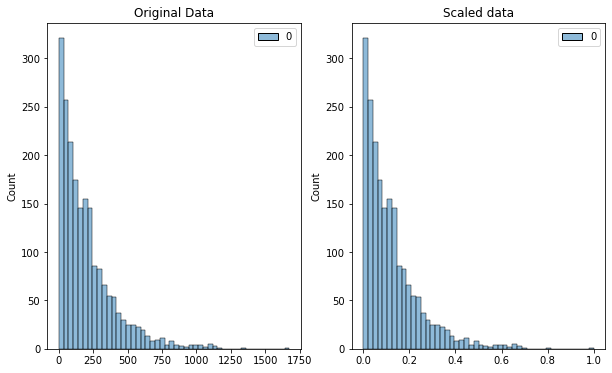

In [18]:
# mix-max scale the data between 0 and 1
import seaborn as sns

def scaler(data_clean):
    scaled_data = minmax_scaler.fit_transform(data_clean)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

Normalization

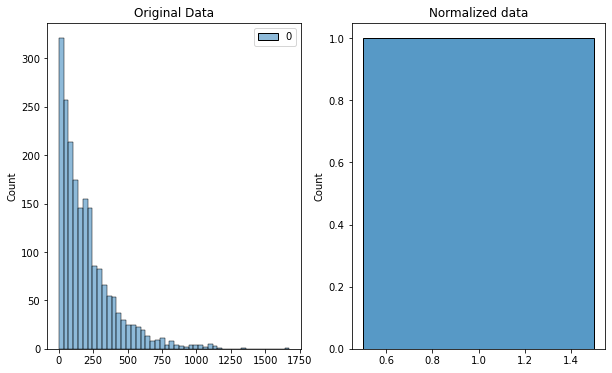

In [19]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [20]:
# check datatypes
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

Exploration of Data

In [21]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

In [24]:
cdf2 = cdf.copy()
cdf2

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [25]:
cdf2.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [26]:
num_of_xDR_sessions = "Dur. (ms)" + "Dur. (ms).1"
num_of_xDR_sessions

'Dur. (ms)Dur. (ms).1'

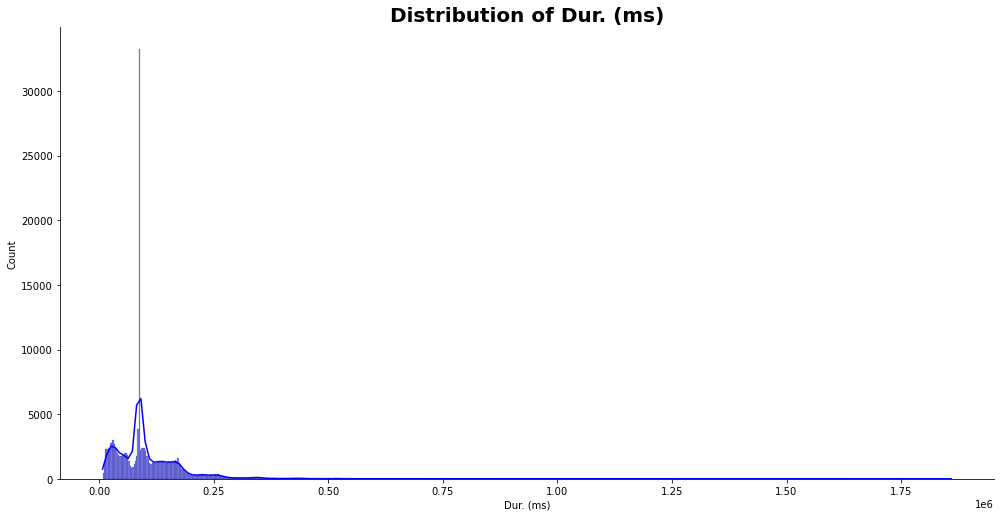

In [28]:
plot_hist(cdf2, "Dur. (ms)", "blue")

In [41]:
Total_UL = "Total UL (Bytes)"
Total_UL

'Total UL (Bytes)'